In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('50_Startups.csv')

In [3]:
df.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [4]:
final_df = pd.concat([df, pd.get_dummies(df['State'], prefix='State')], axis=1).drop('State', axis=1)

In [5]:
X = final_df.drop('Profit', axis=1)
y = final_df['Profit']

In [54]:
X

,R&D Spend,Administration,Marketing Spend,State_California,State_Florida,State_New York
0,165349.20,136897.80,471784.10,0,0,1
1,162597.70,151377.59,443898.53,1,0,0
2,153441.51,101145.55,407934.54,0,1,0
3,144372.41,118671.85,383199.62,0,0,1
4,142107.34,91391.77,366168.42,0,1,0


In [58]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X)

In [59]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_poly, y, test_size=0.2, random_state=0)

In [60]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_test = sc.fit_transform(X_test)
X_train = sc.fit_transform(X_train)

In [61]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [62]:
regressor.predict(X_test)

array([ 99563.53866627, 147332.47373785, 115563.94408863,  59596.20597234,
       156062.26770854, 104877.93632537,  67132.04419623, 106356.09015345,
        89122.69806795, 148857.27358337])

In [63]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

In [65]:
r2_score(y_train, regressor.predict(X_train))

0.9655217841119363

### Best Degree

In [14]:
X = X.drop('State_Florida', axis=1)

In [15]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [16]:
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
sc = StandardScaler()
X_test = sc.fit_transform(X_test)
X_train = sc.fit_transform(X_train)

In [19]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.linear_model import LinearRegression
r2_score_test = []
r2_score_train = []
rms_test = []
rms_train = []
for n in range(1,11):
    print(n)
    poly = PolynomialFeatures(degree=n)
    X_train_poly = poly.fit_transform(X_train)
    X_test_poly = poly.fit_transform(X_test)
    model = LinearRegression()
    model.fit(X_train, y_train)
    y_pred_test = model.predict(X_test)
    r2_score_test.append(r2_score(y_test, y_pred_test))
    y_pred_train = model.predict(X_train)
    r2_score_train.append(r2_score(y_train, y_pred_train))
    rms_test.append(mean_squared_error(y_test, y_pred_test))
    rms_train.append(mean_squared_error(y_train, y_pred_train))


1
2
3
4
5
6
7
8
9
10


In [11]:
r2_score_test, r2_score_train

([0.7797698630368314, -2.438042027598795e+27, -4.032109963607173],
 [0.951557126270021, 0.9710382098321133, 1.0])

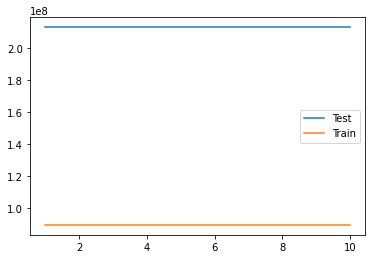

In [20]:
t = np.arange(1,11)
# plt.plot(t, r2_score_test, label='Test')
# plt.plot(t, r2_score_train, label='Train')
plt.plot(t, rms_test, label='Test')
plt.plot(t, rms_train, label='Train')
plt.legend()